# Order Encoding using **SKlearn**

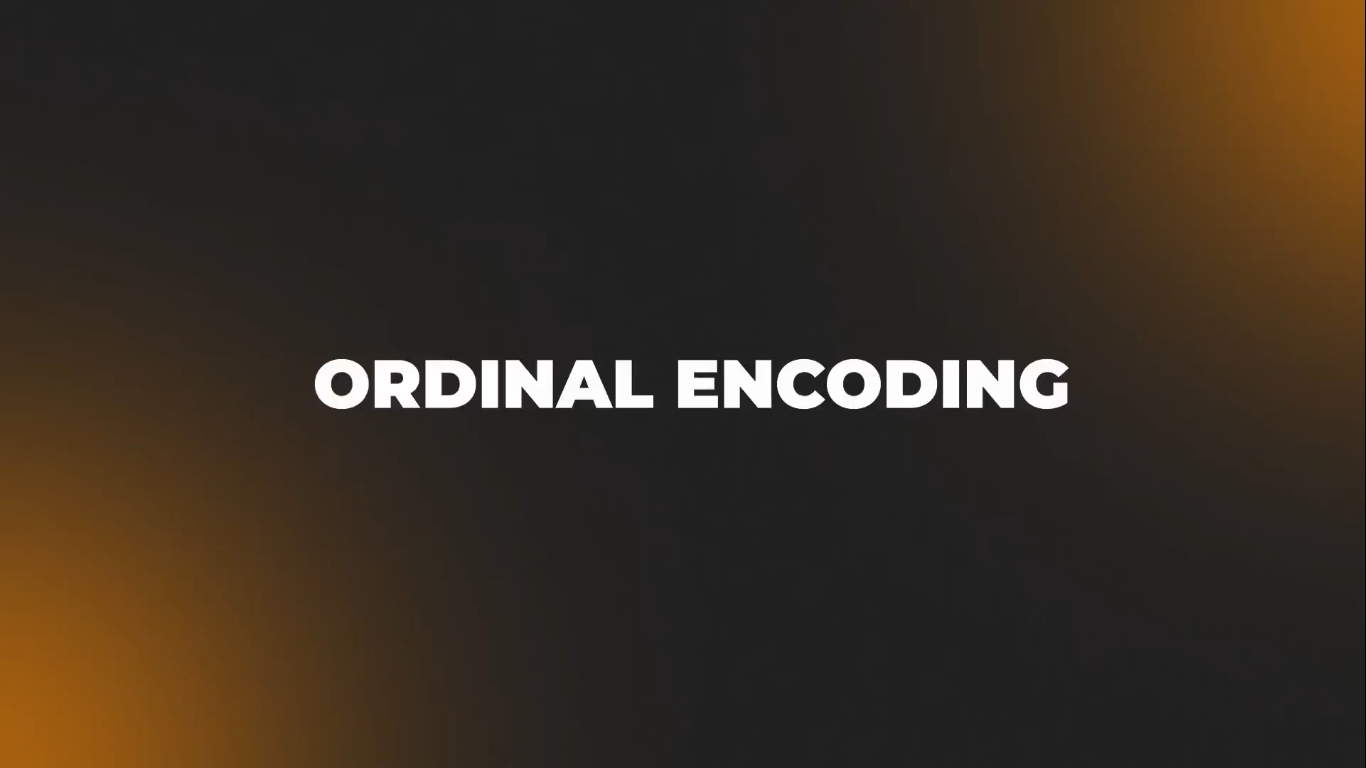

In [2]:
from IPython.display import Image, display
display(Image(filename=r"H:\Programming\Files\Machine Learning\photos\C_08.png"))

In [5]:
import pandas as pd 
from sklearn.preprocessing import OrdinalEncoder 
oe = OrdinalEncoder()

In [15]:
# Create a DataFream 
df = pd.DataFrame({"size":['S','M','L','XL','XXL','M','L','S','M','L','XL','M','XL','S']})
df.head(3)

,size
0,S
1,M
2,L


# Encoding usilng **SKlearn**

In [17]:
# Encode by Order 
ord_data = [['S','M','L','XL','XXL']] # work for 2D Array
oe = OrdinalEncoder(categories= ord_data)
oe.fit(df[["size"]])

OrdinalEncoder(categories=[['S', 'M', 'L', 'XL', 'XXL']])

In [19]:
# Encoding 
df['size_en'] = oe.transform(df[['size']])
df

,size,size_en
0,S,0.0
1,M,1.0
2,L,2.0
3,XL,3.0
4,XXL,4.0
5,M,1.0
6,L,2.0
7,S,0.0
8,M,1.0
9,L,2.0


In [23]:
# Changing data type 
df['size_en'] = df['size_en'].astype(int)
df

,size,size_en
0,S,0
1,M,1
2,L,2
3,XL,3
4,XXL,4
5,M,1
6,L,2
7,S,0
8,M,1
9,L,2


# Using Dataset

In [49]:
df = pd.read_csv(r"H:\Programming\Files\Machine Learning\Files\Loan Dataset.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [51]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
df = df[['Property_Area',"LoanAmount","Gender"]]
df

,Property_Area,LoanAmount,Gender
0,Urban,NaN,Male
1,Rural,128.0,Male
2,Urban,66.0,Male
3,Urban,120.0,Male
4,Urban,141.0,Male
...,...,...,...
609,Rural,71.0,Female
610,Rural,40.0,Male
611,Urban,253.0,Male
612,Urban,187.0,Male


In [55]:
df.isnull().sum()

Property_Area     0
LoanAmount       22
Gender           13
dtype: int64

In [57]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [59]:
# Define category order as a list of lists (required format)
order_data = [['Rural', 'Semiurban', 'Urban']]


In [61]:

from sklearn.preprocessing import OrdinalEncoder

# Create encoder with category order
oe = OrdinalEncoder(categories=order_data)

#'fit_transform'
df[['Property_Area']] = oe.fit_transform(df[['Property_Area']])
df

,Property_Area,LoanAmount,Gender
0,2.0,NaN,Male
1,0.0,128.0,Male
2,2.0,66.0,Male
3,2.0,120.0,Male
4,2.0,141.0,Male
...,...,...,...
609,0.0,71.0,Female
610,0.0,40.0,Male
611,2.0,253.0,Male
612,2.0,187.0,Male
